In [18]:
# Use the aggregated hoshi_workflow namespace for imports
import hoshi_workflow.hoshi_reader as hr
import importlib

# If you edit the underlying module and want to reload in a running
# notebook kernel, reload the module object referenced by `hr`:
importlib.reload(hr)
import matplotlib.pyplot as plt

In [19]:
path = "./example_model/fake_model"

In [20]:
hm = hr.HoshiModel(path)

In [21]:
# read summary/summary.txt
history = hr.HoshiHistory(hm.summary_dir)
n_runs = history.count_runs()
print(f"Number of runs in summary: {n_runs}")

Number of runs in summary: 9


In [23]:
# use 1-based index, here the 9th run is the last run
df = history.read_run(run_index=9)

print(df)

      stg  jcma  nmlo   ndv          time      dtime      Mtot          Etot  \
0    2401     6     5  1024  2.832110e+14  46.116220  19.98911 -6.612613e+50   
1    2402     6     5  1024  2.832110e+14  40.300980  19.98911 -6.589825e+50   
2    2403     6     5  1024  2.832110e+14  52.391270  19.98911 -6.576169e+50   
3    2404     6     5  1024  2.832110e+14  68.108650  19.98911 -6.563016e+50   
4    2405     6     5  1024  2.832110e+14  88.541240  19.98911 -6.548506e+50   
..    ...   ...   ...   ...           ...        ...       ...           ...   
129  2530     7     5  1024  2.832110e+14   0.006269  19.98911 -8.953150e+50   
130  2531     7     5  1024  2.832110e+14   0.005971  19.98911 -9.015551e+50   
131  2532     7     5  1024  2.832110e+14   0.005695  19.98911 -9.078172e+50   
132  2533     7     5  1024  2.832110e+14   0.005438  19.98911 -9.140991e+50   
133  2534     7     5  1024  2.832110e+14   0.005199  19.98911 -9.204008e+50   

     Jtot          dMdt  ...  mach_max 

Text(0, 0.5, 'Temperature [K]')

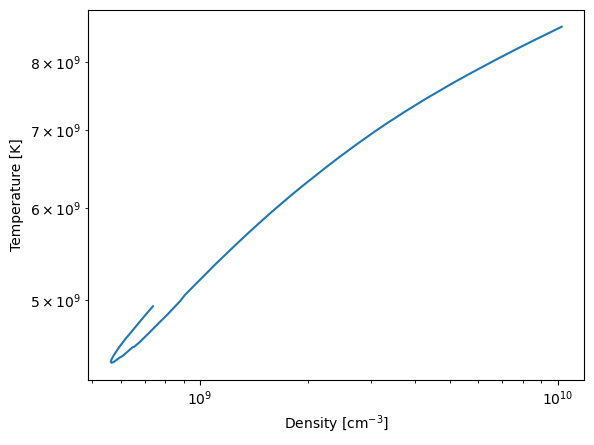

In [26]:
# use df.COLUMN_NAME to access columns directly
den_c = df.dens_c
tmp_c = df.temp_c

plt.plot(den_c, tmp_c,)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Density [cm$^{-3}$]")
plt.ylabel("Temperature [K]")

In [27]:
# generate combined history file
history._generate_combined_data(save_flag=True)  
# read combined history
hist_comb = hr.HoshiHistoryCombined(hm.summary_dir)

print(hist_comb.var_names)

df_combined = hist_comb.dataframe

[   1    2    3 ... 2532 2533 2534]
['stg', 'jcma', 'nmlo', 'ndv', 'time', 'dtime', 'Mtot', 'Etot', 'Jtot', 'dMdt', 'frot', 'dens_c', 'temp_c', 'Rsurf', 'Lsurf', 'Teff', 'vrot', '[N/H]', 'Gedd', 'gam_ave', 'mach_max', 'Brad', 'fconf', 'fbrak', 'eta_B', 'omgs[d-1]', 'omgc[d-1]', 'Lnuc', 'Lnu', 'Lrad']


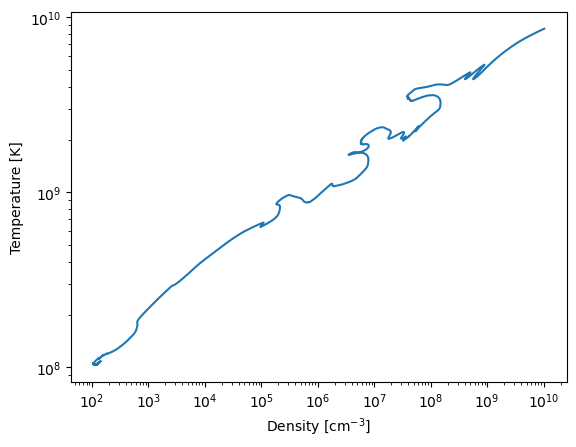

In [29]:
# use df.COLUMN_NAME to access columns directly
den_c = df_combined.dens_c
# for HoshiHistoryCombined, you can also use data() method to get column data
tmp_c = hist_comb.data('temp_c')


plt.plot(den_c, tmp_c,)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Density [cm$^{-3}$]")
plt.ylabel("Temperature [K]")
plt.show()

In [31]:
# read profile data (writestr) for a specific step (stg number)
profile = hr.HoshiProfile(hm.writestr_dir, 2468)
print(profile.var_names)

['j', 'cv', 'EOS', 'Mr', 'dMr', 'dMr*frq', 'Radius', 'Lum', 'Vel', 'Pres', 'Dens', 'Temp', 'entropy', 'gamma', 'sound', 'eint', 'Yi', 'Ye', 'X(D)', 'X(p)', 'X(He)', 'X(C)', 'X(N)', 'X(O)', 'X(Ne)', 'X(Mg)', 'X(Si)', 'X(Fe)', 'ang.mom.', 'ang.vel.', 'epg', 'epn', 'epnu', 'opacity', 'n_ad', 'n_rad', 'n_cv', 'n_mu', 'Dthm', 'Dchem', 'gam_rad', 'Brad', 'Bphi', 'vcv', 'lcv', 'alpha', 'Beq']


In [33]:
# for HoshiProfile, use data() method to get column data
dens = profile.data("Dens")
temp = profile.data("Temp")
mass = profile.data("Mr")

Text(0.5, 0, 'Mass [M$_{\\odot}$]')

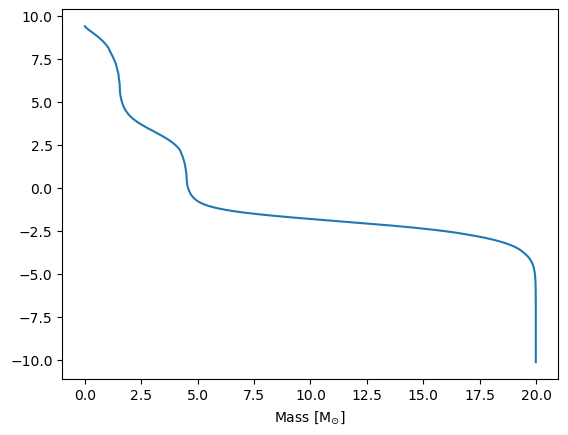

In [35]:
plt.plot(mass, np.log10(dens))
plt.xlabel("Mass [M$_{\\odot}$]")
# plt.ylabel("Density [g/cm$^{-3}$]")

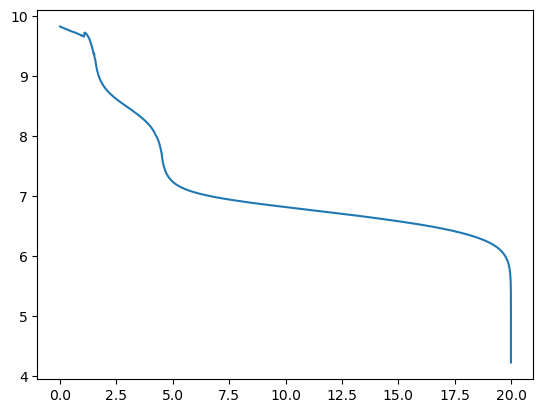

In [36]:
plt.plot(mass, np.log10(temp))

(0.0001, 2)

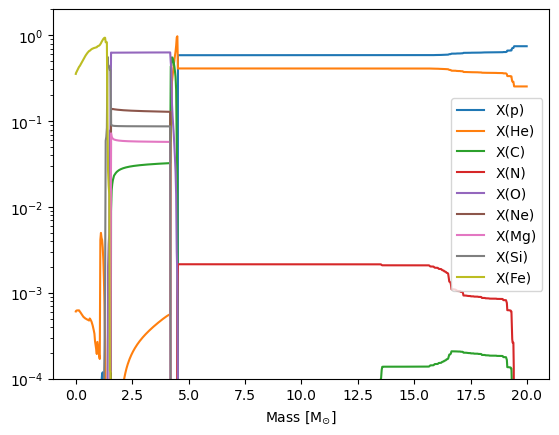

In [37]:
nucs = ["X(p)", "X(He)", "X(C)", "X(N)", "X(O)", "X(Ne)", "X(Mg)", "X(Si)", "X(Fe)"]
for nuc in nucs:
    plt.plot(mass, profile.data(nuc), label=nuc)
plt.xlabel("Mass [M$_{\\odot}$]")
plt.yscale("log")
plt.legend()

plt.ylim(1e-4, 2)